In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
from kerasy.utils import galleryplot

## Data

In [3]:
from kerasy.utils import generateWhirlpool
from kerasy.utils import findLowerUpper
from kerasy.ML.svm import BaseSVM

In [4]:
seed = 1
N = 150
MAX_ITERATION = 60

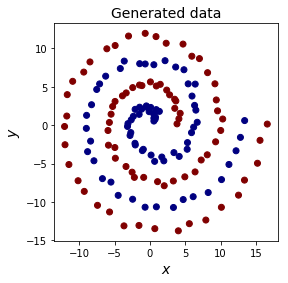

In [5]:
train_x, train_y = generateWhirlpool(N, xmin=0, xmax=4, plot=True, figsize=(4,4))

In [6]:
train_y = BaseSVM.formatting_y(train_y)

Convert 0 to -1 to suit for the SVM train data format.
Convert 1 to  1 to suit for the SVM train data format.


In [7]:
(x1min, x2min),(x1max, x2max) = findLowerUpper(train_x)

In [8]:
X,Y = np.meshgrid(
    np.linspace(x1min, x1max, 100),
    np.linspace(x2min, x2max, 100)
)

## hard SVM

In [9]:
from kerasy.ML.svm import hardSVC

In [10]:
kernels = [
    "linear","polynomial","gaussian",
    "sigmoid","laplacian","inverse_multiquadric"
]

kernel: linear
 60/60 [####################] 100.00% - 151.638s  Rate of Support Vector = 46.0%
kernel: polynomial
 60/60 [####################] 100.00% - 181.798s  Rate of Support Vector = 38.7%
kernel: gaussian
 60/60 [####################] 100.00% - 159.566s  Rate of Support Vector = 24.0%
kernel: sigmoid
 60/60 [####################] 100.00% - 301.119s  Rate of Support Vector = 51.3%
kernel: laplacian
 60/60 [####################] 100.00% - 259.010s  Rate of Support Vector = 32.7%
kernel: inverse_multiquadric
 60/60 [####################] 100.00% - 186.292s  Rate of Support Vector = 28.0%


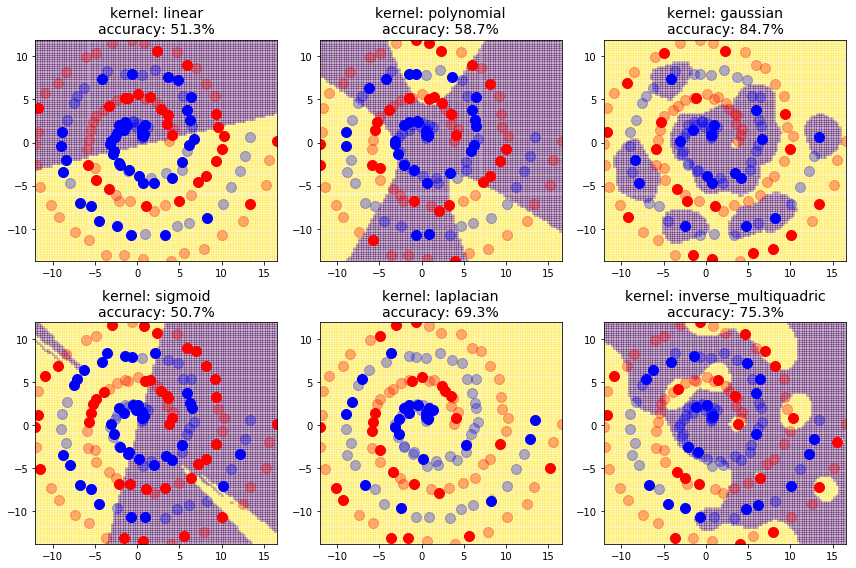

In [11]:
n_fig = len(kernels)
n_col = 3
n_row = n_fig//n_col if n_fig%n_col==0 else n_fig//n_col+1

fig = plt.figure(figsize=(4*n_col,4*n_row))
for i,kernel in enumerate(kernels):
    ax = fig.add_subplot(n_row,n_col,i+1)
    print(f"kernel: {kernel}")
    model = hardSVC(kernel=kernel)
    model.fit(train_x, train_y, max_iter=MAX_ITERATION, sparse_memorize=False)
    
    Z = np.vectorize(lambda x,y: model.predict(np.array([x,y]).reshape(1,-1)))(X, Y) == 1
    ax.pcolor(X, Y, Z, alpha=0.3)
    for i in range(N):
        alpha = 1 if i in model.isSV() else 0.3
        color = "red" if train_y[i]==1 else "blue"
        ax.plot(train_x[i,0], train_x[i,1], marker="o", color=color, markersize=10, alpha=alpha)
    ax.set_title(f"kernel: {kernel}\naccuracy: {100*model.accuracy(train_x, train_y):.1f}%", fontsize=14)
    ax.set_xlim(x1min,x1max), ax.set_ylim(x2min,x2max)
plt.tight_layout()
plt.show()

## Soft SVM

In [12]:
from kerasy.ML.svm import SVC

In [13]:
params = [
    (1e-2,1e-2),(1e-2,1e0),(1e-2,1e2),
    (1e1, 1e-2),(1e1, 1e0),(1e1, 1e2),
    (1e4, 1e-2),(1e4, 1e0),(1e4, 1e2),
]

C=0.01, sigma=0.01
 05/60 [#-------------------]   8.33% - 5.844s  Rate of Support Vector = 77.3%
C=0.01, sigma=1.0
 03/60 [#-------------------]   5.00% - 2.343s  Rate of Support Vector = 79.3%
C=0.01, sigma=100.0
 04/60 [#-------------------]   6.67% - 3.587s  Rate of Support Vector = 78.0%
C=10.0, sigma=0.01
 05/60 [#-------------------]   8.33% - 9.993s  Rate of Support Vector = 92.0%
C=10.0, sigma=1.0
 01/60 [--------------------]   1.67% - 0.000s  Rate of Support Vector = 89.3%
C=10.0, sigma=100.0
 04/60 [#-------------------]   6.67% - 8.346s  Rate of Support Vector = 85.3%
C=10000.0, sigma=0.01
 03/60 [#-------------------]   5.00% - 5.524s  Rate of Support Vector = 85.3%
C=10000.0, sigma=1.0
 12/60 [####----------------]  20.00% - 33.190s  Rate of Support Vector = 86.7%
C=10000.0, sigma=100.0
 05/60 [#-------------------]   8.33% - 11.416s  Rate of Support Vector = 92.0%


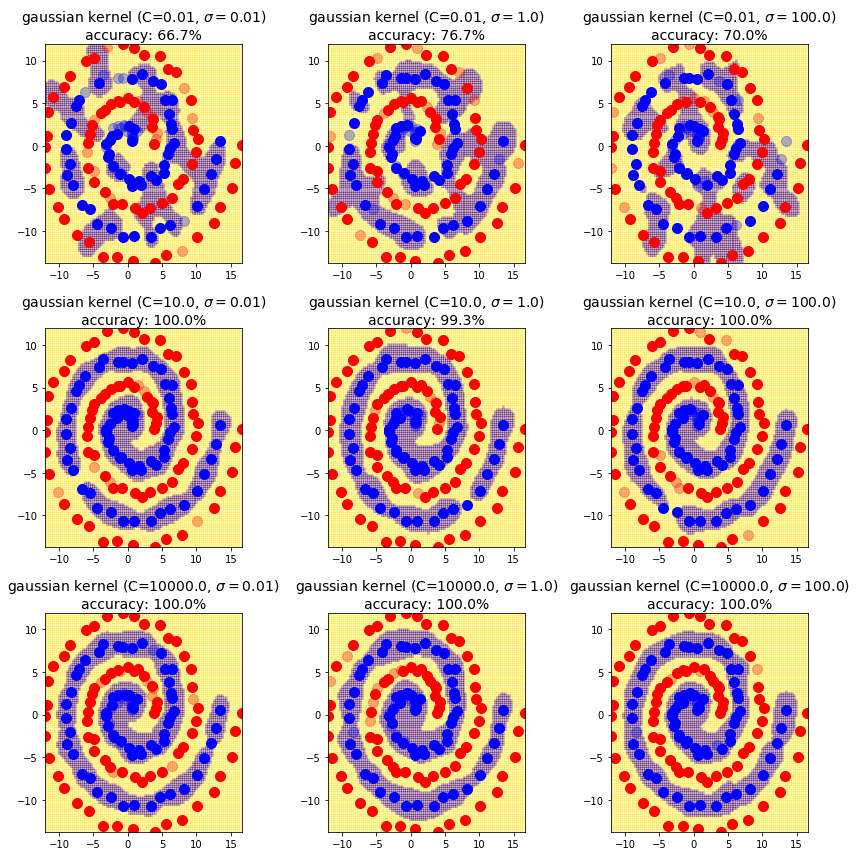

In [14]:
n_fig = len(params)
n_col = 3
n_row = n_fig//n_col if n_fig%n_col==0 else n_fig//n_col+1

fig = plt.figure(figsize=(4*n_col,4*n_row))
for i,(C,sigma) in enumerate(params):
    ax = fig.add_subplot(n_row,n_col,i+1)
    print(f"C={C}, sigma={sigma}")
    model = SVC(kernel="gaussian",C=C,sigma=sigma)
    model.fit(train_x, train_y, max_iter=MAX_ITERATION, sparse_memorize=False)
    
    Z = np.vectorize(lambda x,y: model.predict(np.array([x,y]).reshape(1,-1)))(X, Y) == 1
    ax.pcolor(X, Y, Z, alpha=0.3)
    for i in range(N):
        alpha = 1 if i in model.isSV() else 0.3
        color = "red" if train_y[i]==1 else "blue"
        ax.plot(train_x[i,0], train_x[i,1], marker="o", color=color, markersize=10, alpha=alpha)
    ax.set_title(f"gaussian kernel (C={C}, $\sigma={sigma}$)\naccuracy: {100*model.accuracy(train_x, train_y):.1f}%", fontsize=14)
    ax.set_xlim(x1min,x1max), ax.set_ylim(x2min,x2max)
plt.tight_layout()
plt.show()

## Multiple SVM (Soft)

### Data

In [15]:
from kerasy.utils import generateWholeCakes

In [16]:
r_high = 5
rmin,rmax = -r_high, r_high

In [22]:
X,Y = np.meshgrid(
    np.linspace(rmin, rmax, 100),
    np.linspace(rmin, rmax, 100)
)

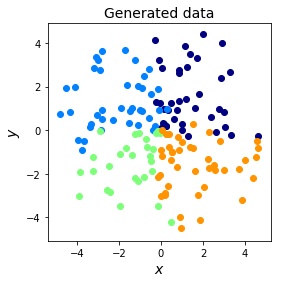

In [17]:
train_x, train_y = generateWholeCakes(4, N, r_high=r_high, same=False, plot=True, seed=seed, figsize=(4,4))

### Train

In [18]:
from kerasy.ML.svm import MultipleSVM

In [19]:
C,sigma = (1e1, 1e-2)

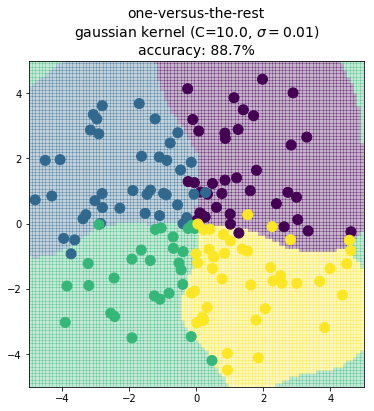

In [24]:
model = MultipleSVM(kernel="gaussian", C=C, sigma=sigma)
model.fit(train_x, train_y, max_iter=MAX_ITERATION, sparse_memorize=False)
Z = np.vectorize(lambda x,y: model.predict(np.array([x,y]).reshape(1,-1)))(X, Y)

plt.figure(figsize=(6,6))
plt.pcolor(X, Y, Z, alpha=0.3)
plt.scatter(train_x[:,0], train_x[:,1], c=train_y, s=100)
plt.title(f"one-versus-the-rest\ngaussian kernel (C={C}, $\sigma={sigma}$)\naccuracy: {100*model.accuracy(train_x, train_y):.1f}%", fontsize=14)
plt.xlim(rmin,rmax), plt.ylim(rmin,rmax)
plt.show()